# introduction 

The dataset I've chosen for examination is the 'Mroz' data frame from the Panel Study of Income Dynamics (PSID), sourced from R's dataset collection. This dataset contains observations of married women in the U.S., focusing on their labor force participation and its influencing factors. Each entry in this dataset is associated with a specific married woman, highlighting details about her and her family's demographic and economic conditions. It comprises eight attributes: lfp, k5, k618, age, wc, hc, lwg, and inc.

source from :[Mroz Dataset Documentation](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Mroz.html)
        
the core research question we are going to analyze is How do factors such as the number of children, age, educational background of both the wife and husband influence the labor-force participation of married women in the U.S.

How effectively can a logistic regression model predict the labor force participation of married women based on demographic and economic variables?

Here is the description variable:

| Variable of dataset   | description                                                                                                                                                                                                 |
|:-------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| lfp                      | Labor-force participation; a factor with levels: no; yes                                                                                                                             |
| k5                       | Number of children 5 years old or younger                                                                                                                                            |
| k618                     | Number of children 6 to 18 years old                                                                                                                                                 |
| age                      | Age in years                                                                                                                                                                         |
| wc                       | Wife's college attendance; a factor with levels: no; yes                                                                                                                             |
| hc                       | Husband's college attendance; a factor with levels: no; yes                                                                                                                          |
| lwg                      | Log expected wage rate; for women in the Labor force, the actual wage rate; for women not in the labor force, an imputed value based on the regression of lwg on the other variables |
| inc                      | Family income exclusive of wife's income                                                                                                                                      


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
from src.laborforce_analysis.data_summary import labor_force_data_summary 

data_url = 'https://raw.githubusercontent.com/Francesgaba/DATA5400/main/Mroz.csv'

# Instantiate the class with the URL.
labor_data = labor_force_data_summary(data_url)

# Load the data.
labor_data.load_data()


Data loaded successfully.


In [28]:
labor_data.display_head()

,rownames,lfp,k5,k618,age,wc,hc,lwg,inc
0,1,yes,1,0,32,no,no,1.210165,10.910001
1,2,yes,0,2,30,no,no,0.328504,19.500000
2,3,yes,1,3,35,no,no,1.514128,12.039999
3,4,yes,0,3,34,no,no,0.092115,6.800000
4,5,yes,1,2,31,yes,no,1.524280,20.100000


In [29]:
labor_data.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  753 non-null    int64  
 1   lfp       753 non-null    object 
 2   k5        753 non-null    int64  
 3   k618      753 non-null    int64  
 4   age       753 non-null    int64  
 5   wc        753 non-null    object 
 6   hc        753 non-null    object 
 7   lwg       753 non-null    float64
 8   inc       753 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 53.1+ KB


In [30]:
labor_data.display_description()

,rownames,k5,k618,age,lwg,inc
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,377.000000,0.237716,1.353254,42.537849,1.097115,20.128965
std,217.516666,0.523959,1.319874,8.072574,0.587556,11.634799
min,1.000000,0.000000,0.000000,30.000000,-2.054124,-0.029000
25%,189.000000,0.000000,0.000000,36.000000,0.818087,13.025000
50%,377.000000,0.000000,1.000000,43.000000,1.068403,17.700001
75%,565.000000,0.000000,2.000000,49.000000,1.399717,24.466000
max,753.000000,3.000000,8.000000,60.000000,3.218876,96.000000


There are 753 rows in total, two continuous variables: lwg, inc,and three categorical variables: k5, k618, age. The original dataset has data types float, integer, and object. After encoding the categorical columns, they are now integers.
#### K5:
The average number of children under 5 (k5) is 0.24, suggesting that most women in the dataset have fewer than one child under 5 years old. 75% of the data indicates 0 children under 5, with a maximum of 3. This means there are very few women with more than 2 children under 5.

#### k618:
The average number of children between the ages of 6 to 18 is 1.35. Half of the women have 1 child in this age range, and 75% have up to 2, with a maximum of 8.

#### Age:
The ages of the women in this dataset range from 30 to 60 years, with an average age of approximately 42.54 years. Half of the women are aged 43 or younger.

#### lwg:
The range for log wages is from -2.05 to 3.22, with an average of approximately 1.

#### Inc:
The family income varies, with an average of about 20.13. The median value is 17.7, indicating that half of the data falls below this value.

### EDA

For continuous variables like this, we plot them as histograms and box plot.

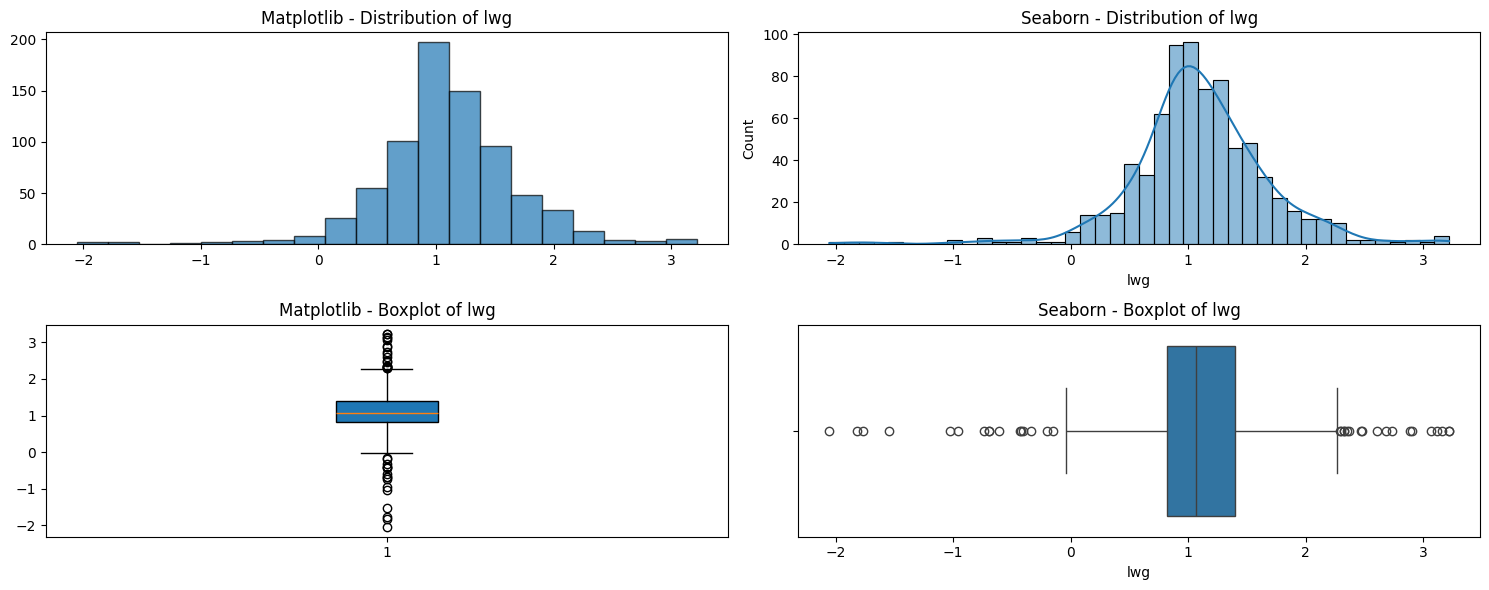

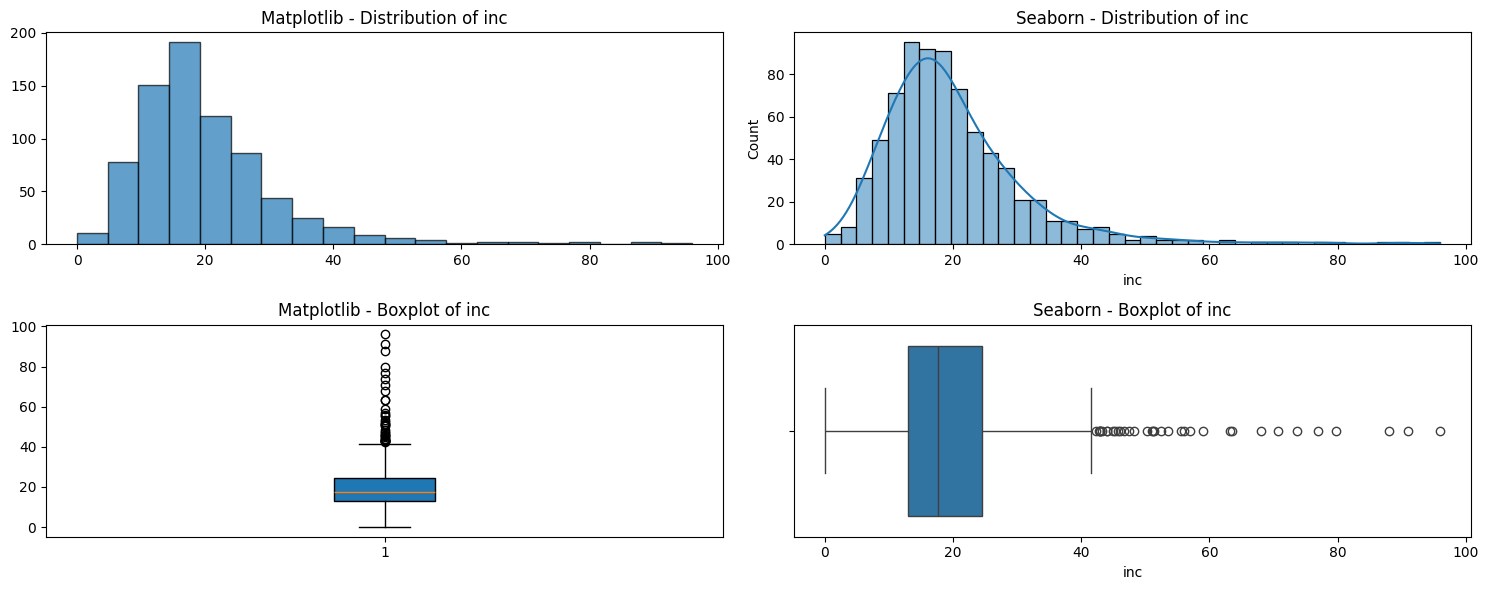

In [31]:
from src.laborforce_analysis.EDA import continuous_variable_visualization

visualization = continuous_variable_visualization(labor_data.df)
visualization.plot_histograms_and_boxplots()

#### lwg:
The distribution of 'lwg' variable, according to the histogram, show a symmetrical shape with a central peak roughly at the value of 1. The frequency of data points decreases steadily from the center towards both tails, showing a distribution that is relatively balanced on either side of the peak. This symmetry around the central could indicate a distribution of approximately normal, though formal statistical testing would be required to confirm this

#### inc:
The distribution of 'inc' variable, showing a pronounced skew towards the higher end of the scale. This right-skewed distribution suggests a greater concentration of data points in the lower income bracket, with a gradually decline in frequency as income increases. The presence of this tail indicates that while most families have a relatively low income, there are a few with significantly higher incomes

For continuous variables like this, we plot them as bar chart.

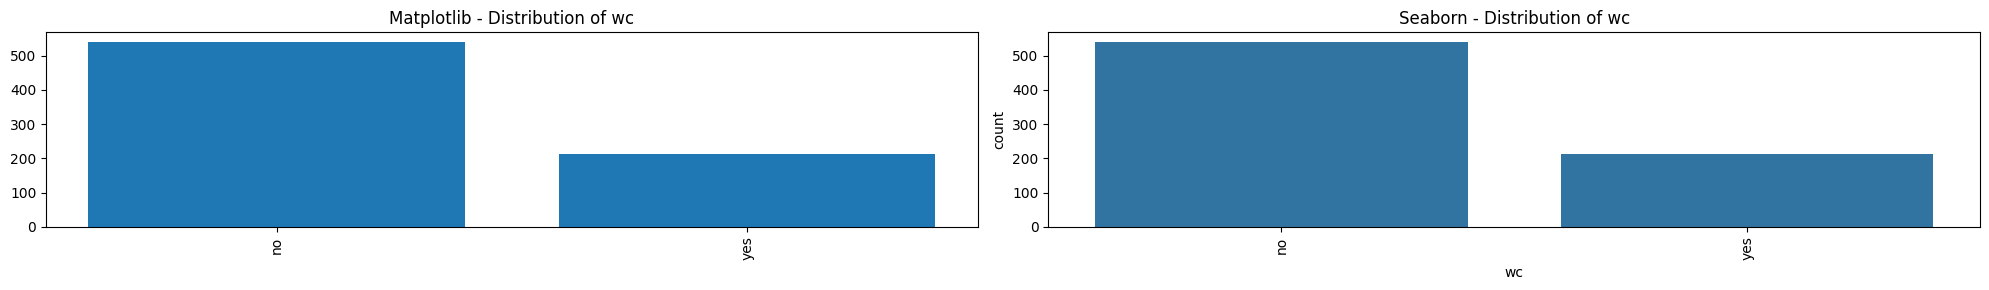

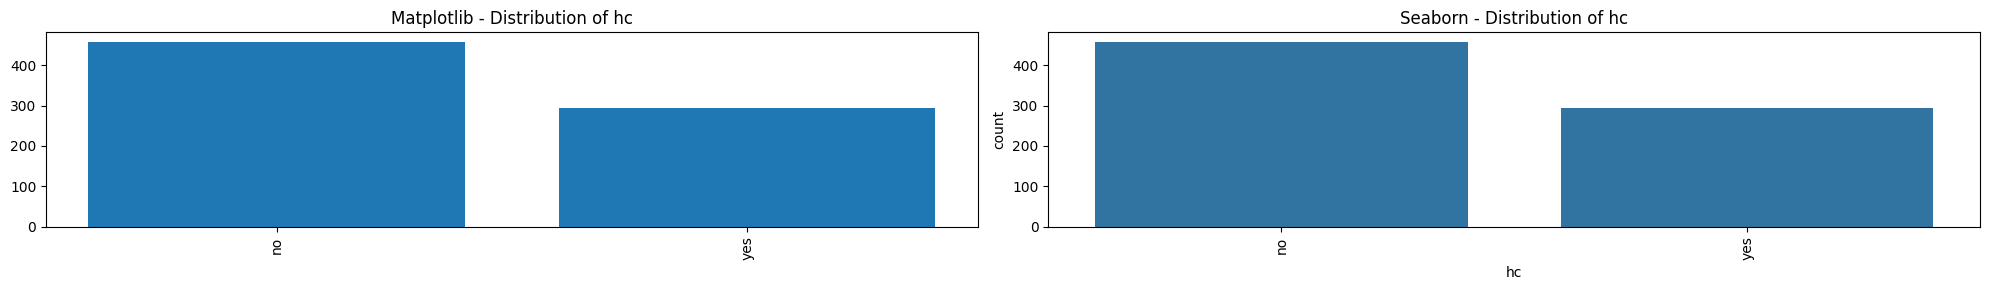

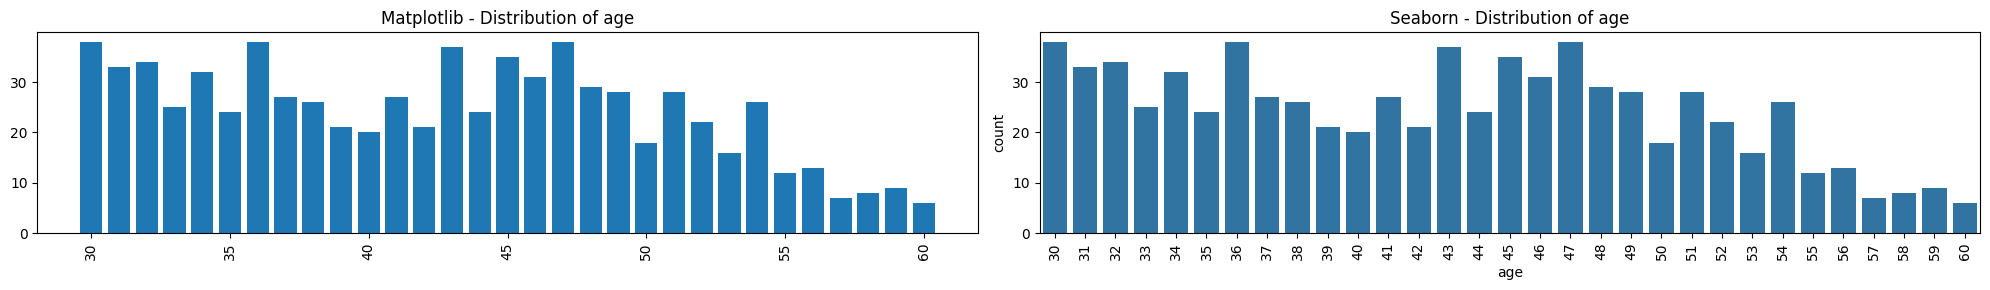

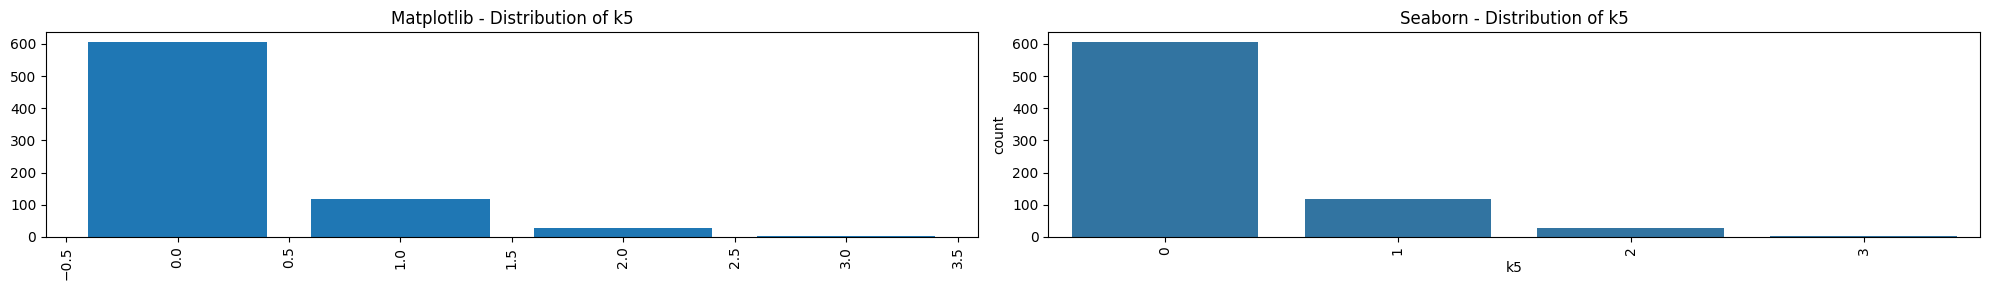

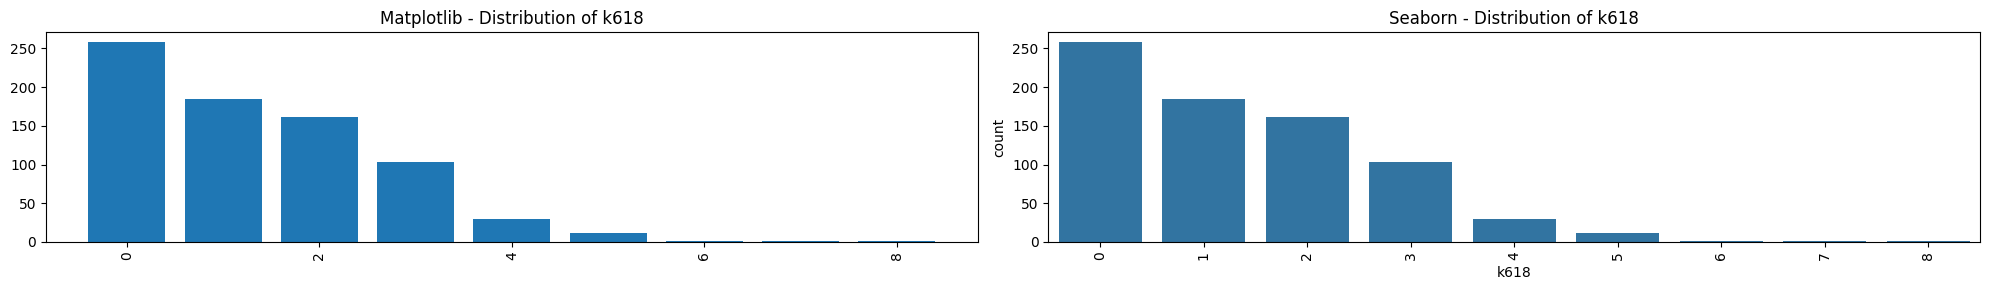

In [32]:
from src.laborforce_analysis.EDA import Categorical_variable

categorical_visualization = Categorical_variable(labor_data.df)
categorical_visualization.plot_distributions()

The bar charts above represent categorical and discrete variables. In the 'wc' column, we observe around 200 'yes' entries. The 'hc' column reveals close to 300 'yes' responses. In terms of age distribution for the surveyed women, ages 36 and 48 have the most representation. nearly 600 respondents don't have children under 5 years. Furthermore, the distribution for 'k618' reveals that most families in the dataset have either 0 or 1 child aged between 6 to 18 years, and there's a significant decline in the count as the number of children within this age group increases.


All variables have a perfect correlation of 1.00 with themselves, which is standard for any correlation matrix.

there is a moderate negative correlation between age and the number of children 5 years old or younger (k5), and between age and the number of children 6 to 18 years old (k618), indicating that younger women  totend have more children. There's also a moderate positive correlation between the husband's and wife's college attendance (hc and wc ), indicating that spouses are likely to have similar levels of education. Labor force participation (lfp ) shows a slight negative correlation with the number of young children (k5) and age, which may imply that lfp on decreases with an increase in the number of young children and with the age of the women. Other variables show low correlations with labor force participation,indicating no strong linear relationship with this outcome.

Next we are encoding all the binary categrical variable

In [33]:
from src.laborforce_analysis.EDA import correlation_matrix

visualization = correlation_matrix(labor_data.df)

# encoding categorical variables
columns_to_encode = ['lfp', 'wc', 'hc']
mapping = {'yes': 1, 'no': 0}
visualization.encode_categorical_variables(columns_to_encode, mapping)

Let's check the distribution of target varibale

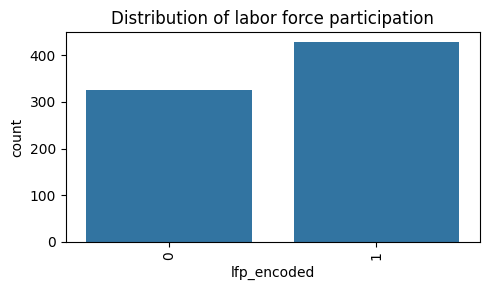

In [34]:
categorical_visualization.target_variable()

 we can discern that in the 'lfp' column, there are over 400 entries indicating 'yes',since our target varibale is classification ,so on the next step ,we are going to calculate null_error_rate,that is a benchmark for fallowing prediction

In [35]:
categorical_visualization.null_error_rate()

Most Common Class: 1
Null Error Rate: 0.4316069057104913


Most Common Class: 1
  For a classifier trained on this data, there's a high likelihood it will be biased towards predicting class '1' more frequently due to its imbalanced.

Null Error Rate:
a model that always predicts the most common class (which is 1) would be wrong approximately 43.16% 

### Feature Engineer

research question 1 will also be answered in this part

new younger children variable(k5)

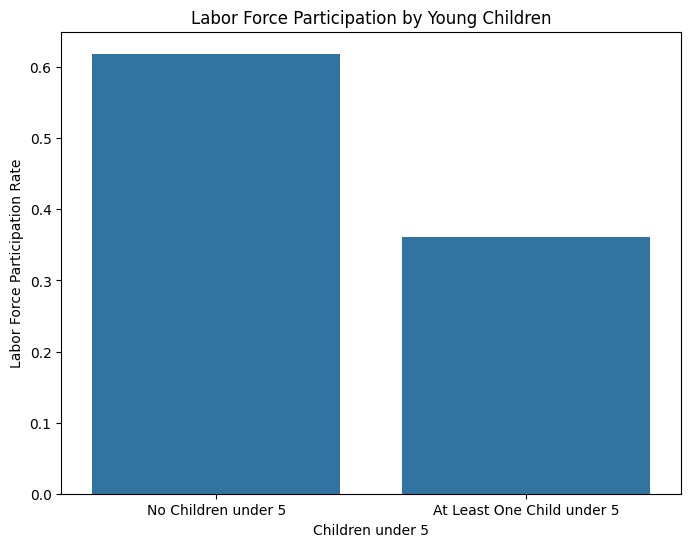

In [36]:
from src.laborforce_analysis.question_analysis import labor_force_participation

visualizer = labor_force_participation(labor_data.df)
visualizer.plot_lfp_by_k5()


Women with no children under the age of 5 have a higher labor force participation rate compared to those with at least one child under 5. This suggests that having younger children may be associated with a lower likelihood of participating in the labor force, possibly due to the increased childcare demands for very young children.

new older children variable(k618)

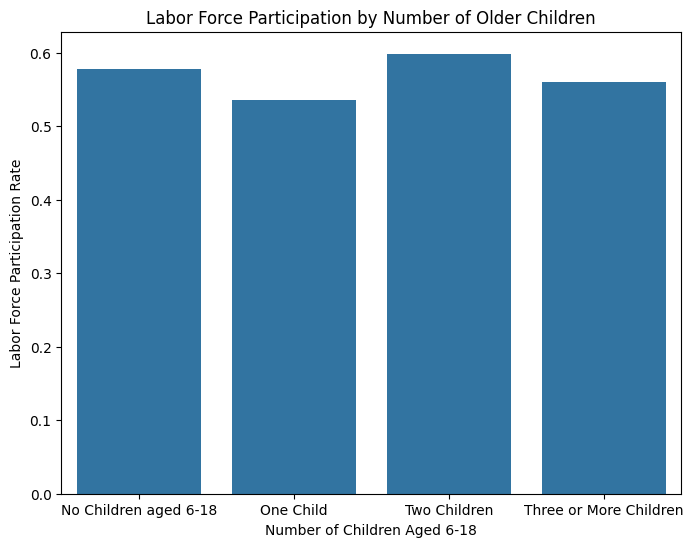

In [37]:

from src.laborforce_analysis.question_analysis import older_children_lfp

older_children_lfp_viz = older_children_lfp(labor_data.df)

# Plotting labor force participation by number of older children
older_children_lfp_viz.plot_lfp_rate_by_children_number()


Women with two children aged 6-18 have the highest labor force participation rate, while those with 1 or 3 children and have a lower rate.

This pattern may indicate that while having one child aged 6-18 might slightly decrease labor force participation, having two children incresing the rate. However, having three or more children aged 6-18 tends to decrease a woman's participation in the labor force, which could be due to the increased responsibility and potential scheduling complexities associated with managing the activities and needs of multiple older children.

new education ralated variable  (hw,wc)

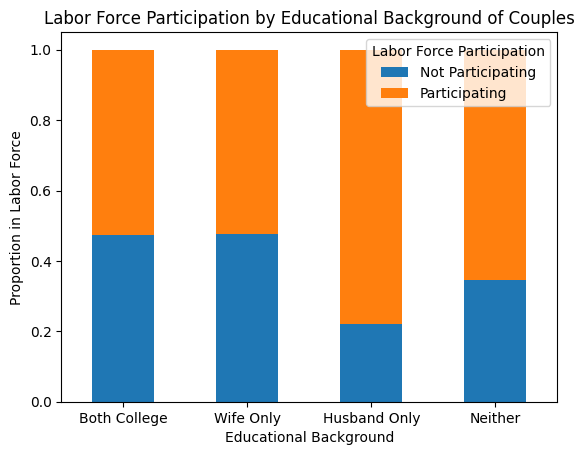

In [38]:
from src.laborforce_analysis.question_analysis import Couple_Education_LFP

visualization = Couple_Education_LFP(labor_data.df)
visualization.prepare_data()
visualization.plot_lfp_by_education()


Both College: Both the wife and husband attended college.

Wife Only:  Only the wife attended college.

Husband Only - Only the husband attended college.

Neither - Neither the wife nor the husband attended college.

This show that educational attainment, particularly where neither spouses and wife only have attended college, may be associated with a higher likelihood of labor force participation among married women

New age group variable (age)

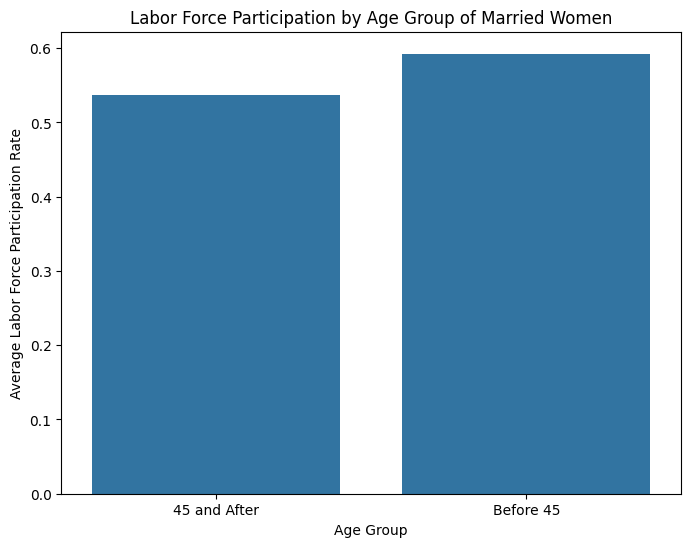

In [39]:
from src.laborforce_analysis.question_analysis import Age_Group_LFP
# Example usage:
# Assuming df is your DataFrame
visualization = Age_Group_LFP(labor_data.df)
visualization.create_age_group_variable()
visualization.plot_lfp_by_age_group()



 It show the average labor force participation rate of married women, that segmented into two age groups: before the age of 45 and 45 and after. The rate for those before 45 is visually higher than the rate for those 45 and after. This suggests a higher labor force participation among younger married women compared to their older counterparts.

Dataframe after engineering

In [40]:
labor_data.display_head()

,rownames,lfp,k5,k618,age,wc,hc,lwg,inc,lfp_encoded,wc_encoded,hc_encoded,k5_binary,k618_grouped,BothCollege,WifeOnly,HusbandOnly,Neither,age_group
0,1,yes,1,0,32,no,no,1.210165,10.910001,1,0,0,1,0,False,False,False,True,Before 45
1,2,yes,0,2,30,no,no,0.328504,19.500000,1,0,0,0,2,False,False,False,True,Before 45
2,3,yes,1,3,35,no,no,1.514128,12.039999,1,0,0,1,3+,False,False,False,True,Before 45
3,4,yes,0,3,34,no,no,0.092115,6.800000,1,0,0,0,3+,False,False,False,True,Before 45
4,5,yes,1,2,31,yes,no,1.524280,20.100000,1,1,0,1,2,False,True,False,False,Before 45


In [41]:
labor_data.display_data_types()

rownames          int64
lfp              object
k5                int64
k618              int64
age               int64
wc               object
hc               object
lwg             float64
inc             float64
lfp_encoded       int64
wc_encoded        int64
hc_encoded        int64
k5_binary         int64
k618_grouped     object
BothCollege        bool
WifeOnly           bool
HusbandOnly        bool
Neither            bool
age_group        object
dtype: object

### New Feature Encoding 

In [42]:

labor_data.df['BothCollege_encoded'] = labor_data.df['BothCollege'].astype(int)
labor_data.df['WifeOnly_encoded'] = labor_data.df['WifeOnly'].astype(int)
labor_data.df['HusbandOnly_encoded'] = labor_data.df['HusbandOnly'].astype(int)
labor_data.df['Neither_encoded'] = labor_data.df['Neither'].astype(int)


In [43]:
from src.laborforce_analysis.EDA import correlation_matrix

visualization = correlation_matrix(labor_data.df)

k618_grouped_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
age_group_mapping = {'Before 45': 1, '45 and After': 0}

# Encode categorical variables
visualization.encode_categorical_variables(['k618_grouped'], k618_grouped_mapping)
visualization.encode_categorical_variables(['age_group'], age_group_mapping)

# Now your DataFrame within the visualization instance should have the encoded columns


In [44]:
labor_data.display_head()

,rownames,lfp,k5,k618,age,wc,hc,lwg,inc,lfp_encoded,...,WifeOnly,HusbandOnly,Neither,age_group,BothCollege_encoded,WifeOnly_encoded,HusbandOnly_encoded,Neither_encoded,k618_grouped_encoded,age_group_encoded
0,1,yes,1,0,32,no,no,1.210165,10.910001,1,...,False,False,True,Before 45,0,0,0,1,0,1
1,2,yes,0,2,30,no,no,0.328504,19.500000,1,...,False,False,True,Before 45,0,0,0,1,2,1
2,3,yes,1,3,35,no,no,1.514128,12.039999,1,...,False,False,True,Before 45,0,0,0,1,3,1
3,4,yes,0,3,34,no,no,0.092115,6.800000,1,...,False,False,True,Before 45,0,0,0,1,3,1
4,5,yes,1,2,31,yes,no,1.524280,20.100000,1,...,True,False,False,Before 45,0,1,0,0,2,1


After feature engineering and encoding all new feature , we need to drop the previous feature and show the feature left

In [45]:
columns_to_drop = ['rownames', 'lfp', 'k5', 'k618', 'age', 'wc', 'hc', 
                   'k618_grouped', 'BothCollege', 'WifeOnly', 'HusbandOnly', 'Neither', 'age_group']

# Drop the columns
labor_data.df.drop(columns=columns_to_drop, inplace=True)

# Now the DataFrame should only contain the encoded columns and other numerical columns
print(labor_data.df.columns)

Index(['lwg', 'inc', 'lfp_encoded', 'wc_encoded', 'hc_encoded', 'k5_binary',
       'BothCollege_encoded', 'WifeOnly_encoded', 'HusbandOnly_encoded',
       'Neither_encoded', 'k618_grouped_encoded', 'age_group_encoded'],
      dtype='object')


check the missing vlaue

In [46]:
labor_data.display_missing_values()

lwg                     0
inc                     0
lfp_encoded             0
wc_encoded              0
hc_encoded              0
k5_binary               0
BothCollege_encoded     0
WifeOnly_encoded        0
HusbandOnly_encoded     0
Neither_encoded         0
k618_grouped_encoded    0
age_group_encoded       0
dtype: int64

In [55]:
from src.laborforce_analysis.question_analysis import labor_force_model

LogisticRegression_model = labor_force_model(labor_data.df)
LogisticRegression_model.train_and_evaluate()

Model Accuracy: 0.6769911504424779
Model Precision: 0.7333333333333333
Model Recall: 0.7279411764705882
Model F1 Score: 0.7306273062730627


Accuracy: About 67.7% of all predictions made by the model are correct.

Precision: Approximately 73.3% of the instances that the model predicted as positive (class '1' for lfp_encoded) are actually positive.

Recall: About 72.8% of the actual positive instances were correctly predicted by the model as positive.

F1 Score: The harmonic mean of precision and recall is about 73.1%, indicating a balance between the precision and recall in your model.

for more accurate prediction ,we are going to use cross-validation （cv=5）to do a multiple testing

In [56]:
from src.laborforce_analysis.question_analysis import labor_force_model

metrics = labor_force_model(labor_data.df)
metrics.compute_accuracy()
metrics.compute_precision()
metrics.compute_recall()
metrics.compute_f1()

Cross-Validation Accuracy Scores: [0.60264901 0.60927152 0.7218543  0.70666667 0.62666667]
Average CV Accuracy: 0.6534216335540839
Cross-Validation Precision Scores: [0.64772727 0.68493151 0.775      0.78873239 0.67058824]
Average CV Precision: 0.7133958818473805
Cross-Validation Recall Scores: [0.6627907  0.58139535 0.72093023 0.65882353 0.67058824]
Average CV Recall: 0.6589056087551299
Cross-Validation F1 Scores: [0.65517241 0.62893082 0.74698795 0.71794872 0.67058824]
Average CV F1: 0.6839256272906462


## conclusion 

In this analysis, we employed logistic regression to understand and predict labor force participation.Our key findings revealed that the model achieved an average cross-validation accuracy of 65.34%, with a precision of 71.34%, recall of 65.89%, and an F1 score of 68.39%. These metrics indicate a moderate level of predictive power, suggesting that while the model is relatively good at identifying labor force participation, there is room for improvement, particularly in terms of recall.

A limitation of our study was the potential imbalance in our dataset, which was addressed by using balanced class weights in the logistic regression model. Future work could explore more sophisticated methods to handle class imbalance, such as SMOTE or advanced ensemble methods.

In conclusion, this analysis provides valuable insights into factors influencing labor force participation and demonstrates the utility of logistic regression in this context. Future research could extend this work by incorporating more diverse data sources, exploring alternative modeling techniques, and applying the model to predict real-world labor force participation scenarios.

